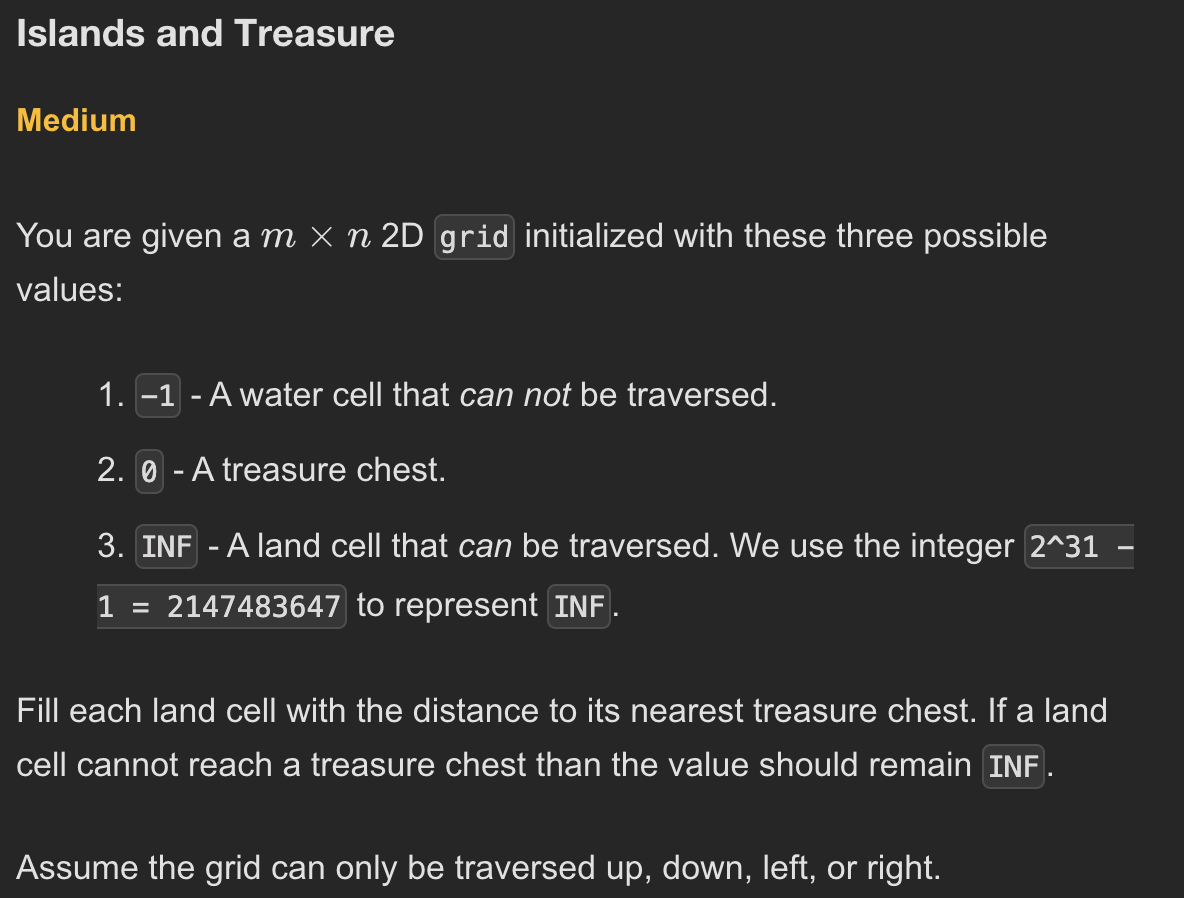

In [ ]:
# Solution 1
# Find a gate (treasure) update the grid and move on to the next gate (treasure).
# Time: O(KMN) where the grid size is MXN and K is number of keys. Worse case all the cells have a key causing  O((MN)^2)
# Memory: O(MN)

class Solution:
    def boundryCheck(self, i, j):
        return 0 <= i < self.m and 0 <= j < self.n

    def islandsAndTreasure(self, grid: List[List[int]]) -> None:
        self.m = len(grid)
        self.n = len(grid[0])

        def resursiveUpadte(i, j, val):
            nonlocal grid
            grid[i][j] = val
            # Update down, right, up, left
            for ii, jj in [(1,0), (0, 1), (-1, 0), (0, -1)]:
                newI, newJ = i+ii, j+jj
                if self.boundryCheck(newI, newJ) and grid[newI][newJ] > val + 1:
                    resursiveUpadte(newI, newJ, val+1)
        
        # Find a gate (treasure)
        for i in range(self.m):
            for j in range(self.n):
                if grid[i][j] == 0:
                    resursiveUpadte(i, j, 0) # Update the grid
        return grid

In [ ]:
# Solution 2 (multi source BFS - similar to A*)
# Time: O(MN) where the grid size is MXN
# Memory: O(MN)

class Solution:
    def islandsAndTreasure(self, grid: List[List[int]]) -> None:

        def isInside(i, j):
            if 0 <= i < m and 0 <= j < n:
                return True
            return False

        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        m, n = len(grid), len(grid[0])
        
        queue = deque()
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 0:
                    queue.append((i, j))
                    
        while queue:
            for _ in range(len(queue)):
                i, j = queue.popleft()
                nextVal = grid[i][j] + 1
                for di, dj in directions:
                    if isInside(i+di, j+dj) and  grid[i+di][j+dj] > nextVal:
                        queue.append((i+di, j+dj))
                        grid[i+di][j+dj] = nextVal